In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,513 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
samsung = pd.read_csv("Samsung.csv")
kakao = pd.read_csv("Kakao.csv")
kospi = pd.read_csv("Kospi.csv")

In [5]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-30,53900.0,53900.0,52800.0,52800.0,50962.460938,21157172
1,2020-07-01,53400.0,53600.0,52400.0,52600.0,50769.417969,16706143
2,2020-07-02,52100.0,52900.0,52100.0,52900.0,51058.980469,14142583
3,2020-07-03,53000.0,53600.0,52700.0,53600.0,51734.617188,11887868
4,2020-07-06,54000.0,55000.0,53800.0,55000.0,53085.894531,19856623


In [7]:
samsung.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
samsung.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)
samsung.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [9]:
import matplotlib.ticker as ticker

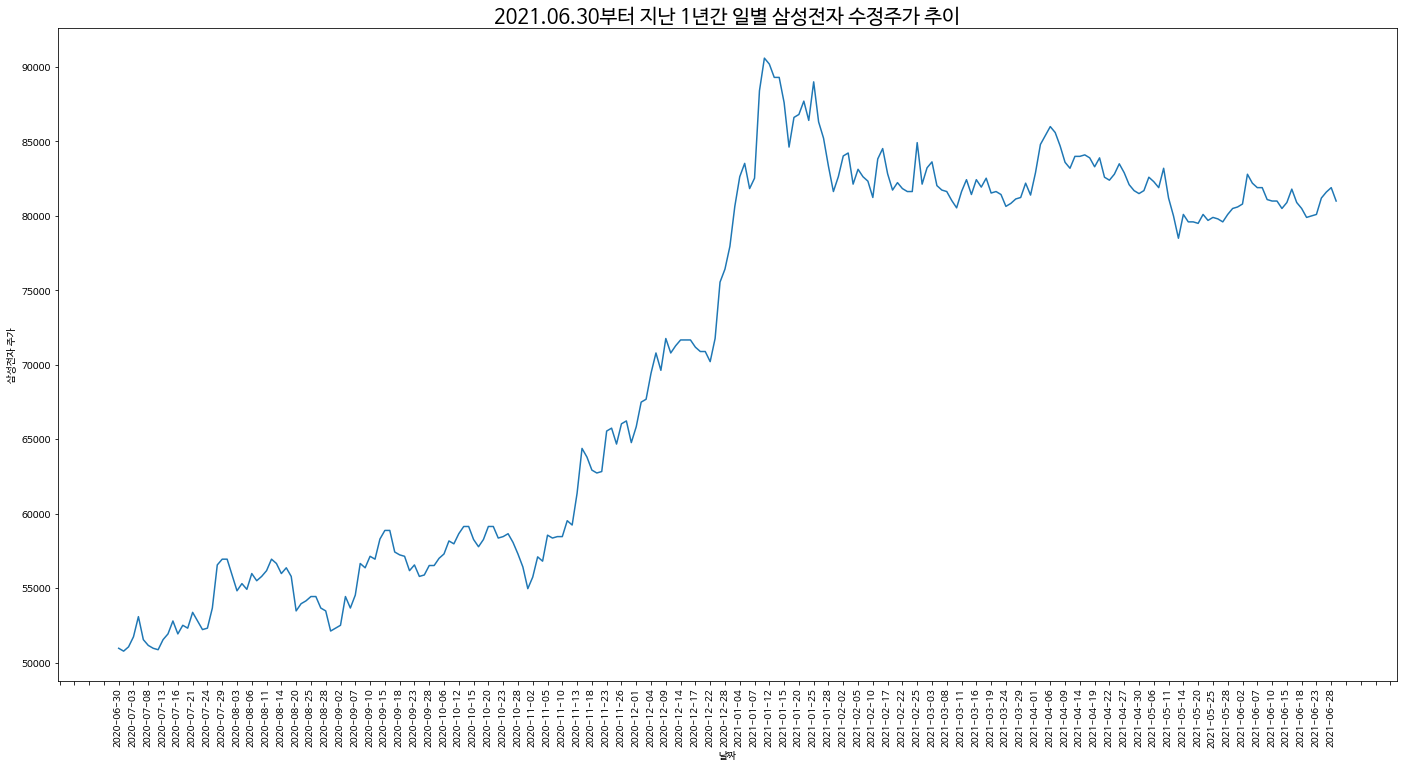

In [10]:
# 수정주가 시각화
plt.figure(figsize=(24,12))
plt.plot(samsung.Date, samsung.Adj_Close)
plt.xticks(rotation=90)
plt.title("2021.06.30부터 지난 1년간 일별 삼성전자 수정주가 추이", fontsize = 20)
plt.xlabel("날짜")
plt.ylabel("삼성전자 주가")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # 3일 간격으로 보여줌

In [11]:
import math
import numpy as np

In [12]:
# 삼성전자 수정주가 차분
ss = []
ss.append(0) # 0번째 인덱스는 안쓰니까 임의로 아무 숫자 넣어줌
buf = samsung.Adj_Close # buf 변수에 할당
size = len(buf) # buf 길이 변수 선언
for i in range(1, size): # 수익률 계산
  res = np.log(buf[i]/buf[i-1])
  ss.append(res)

ss = pd.DataFrame(ss) 
ss.head()

,0
0,0.000000
1,-0.003795
2,0.005687
3,0.013146
4,0.025784


In [15]:
samsung["samsung_r"] = ss
samsung.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,samsung_r
0,2020-06-30,53900.0,53900.0,52800.0,52800.0,50962.460938,21157172,0.000000
1,2020-07-01,53400.0,53600.0,52400.0,52600.0,50769.417969,16706143,-0.003795
2,2020-07-02,52100.0,52900.0,52100.0,52900.0,51058.980469,14142583,0.005687
3,2020-07-03,53000.0,53600.0,52700.0,53600.0,51734.617188,11887868,0.013146
4,2020-07-06,54000.0,55000.0,53800.0,55000.0,53085.894531,19856623,0.025784


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


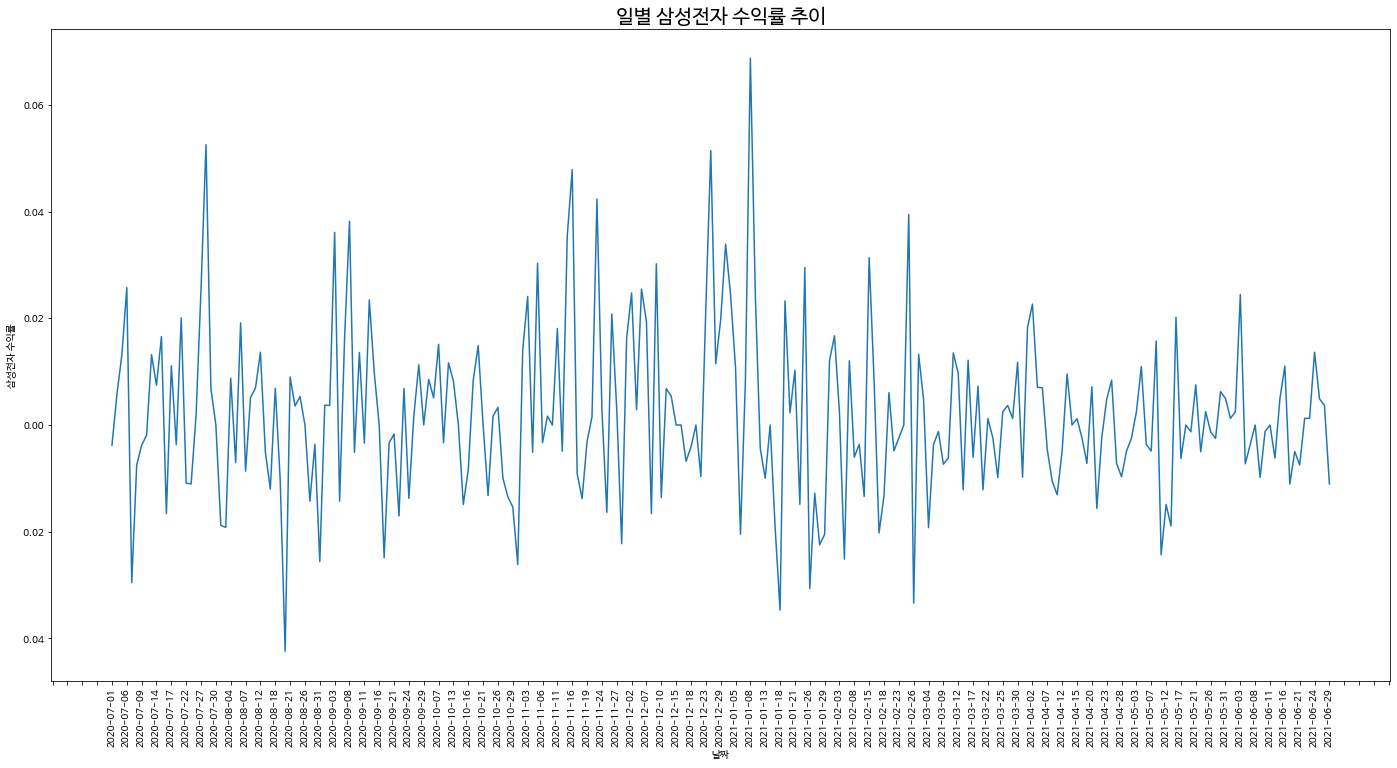

In [16]:
# 수익률 시각화
plt.figure(figsize=(24,12))
plt.plot(samsung.Date[1:], samsung.samsung_r[1:])
plt.xticks(rotation=90)
plt.title("일별 삼성전자 수익률 추이", fontsize = 20)
plt.xlabel("날짜")
plt.ylabel("삼성전자 수익률")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # 3일 간격으로 보여줌

In [17]:
kakao.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
kakao.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)
kakao.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [19]:
kospi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
kospi.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)
kospi.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [24]:
# 카카오 수정주가 차분
kk = []
kk.append(0) # 0번째 인덱스는 안쓰니까 임의로 아무 숫자 넣어줌
buf = kakao.Adj_Close # buf 변수에 할당
size = len(buf) # buf 길이 변수 선언
for i in range(1, size): # 수익률 계산
  res = np.log(buf[i]/buf[i-1])
  kk.append(res)

kk = pd.DataFrame(kk) 
kk.head()

,0
0,0.000000
1,0.007449
2,0.057674
3,0.029338
4,0.021868


In [25]:
# 코스피 수정주가 차분
ks = []
ks.append(0) # 0번째 인덱스는 안쓰니까 임의로 아무 숫자 넣어줌
buf = kospi.Adj_Close # buf 변수에 할당
size = len(buf) # buf 길이 변수 선언
for i in range(1, size): # 수익률 계산
  res = np.log(buf[i]/buf[i-1])
  ks.append(res)

ks = pd.DataFrame(ks) 
ks.head()

,0
0,0.000000
1,-0.000773
2,0.013517
3,0.007948
4,0.016368


In [26]:
kakao["kakao_r"] = kk
kakao.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,kakao_r
0,2020-06-30,54400.0,54600.0,53500.0,53500.0,53478.484375,3120445,0.000000
1,2020-07-01,54300.0,55000.0,53500.0,53900.0,53878.324219,2890115,0.007449
2,2020-07-02,54700.0,57100.0,54600.0,57100.0,57077.035156,6892725,0.057674
3,2020-07-03,57900.0,59400.0,56800.0,58800.0,58776.351563,8022465,0.029338
4,2020-07-06,59600.0,61500.0,59400.0,60100.0,60075.832031,6724255,0.021868


In [27]:
kospi["kospi_r"] = ks
kospi.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,kospi_r
0,2020-06-30,2124.379883,2134.379883,2108.260010,2108.330078,2108.330078,708600,0.000000
1,2020-07-01,2128.810059,2133.550049,2101.330078,2106.699951,2106.699951,1116200,-0.000773
2,2020-07-02,2116.719971,2135.370117,2113.979980,2135.370117,2135.370117,1092000,0.013517
3,2020-07-03,2147.889893,2153.540039,2135.300049,2152.409912,2152.409912,770100,0.007948
4,2020-07-06,2158.949951,2191.280029,2157.709961,2187.929932,2187.929932,666900,0.016368


In [34]:
temp = pd.DataFrame(index=range(0,3), columns=[])
temp["ss"] = ss
temp["kk"] = kk
temp["ks"] = ks
temp.head()

,ss,kk,ks
0,0.000000,0.000000,0.000000
1,-0.003795,0.007449,-0.000773
2,0.005687,0.057674,0.013517


In [36]:
import statsmodels.formula.api as sm

result = sm.ols(formula = 'ks ~ ss + kk', data = temp).fit()

print('절편과 기울기:', result.params)
print()
print('유의확률:', result.pvalues)
print()
print('결정계수:', result.rsquared)
print('예측:', result.predict())

절편과 기울기: Intercept    1.075491e-15
ss           5.561779e-01
kk           1.795298e-01
dtype: float64

유의확률: Intercept   NaN
ss          NaN
kk          NaN
dtype: float64

결정계수: 1.0
예측: [ 1.07549090e-15 -7.73483021e-04  1.35172697e-02]


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [37]:
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ks   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 29 Jun 2021   Prob (F-statistic):                nan
Time:                        23:42:33   Log-Likelihood:                 99.137
No. Observations:                   3   AIC:                            -192.3
Df Residuals:                       0   BIC:                            -195.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.075e-15        inf          0        nan         nan         nan
ss             0.5562        inf          0        nan         nan         nan
kk             0.1795        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.436
Skew:                          -0.557   Prob(JB):                        0.804
Kurtosis:                       1.500   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
temp.corr()

,ss,kk,ks
ss,1.000000,0.863863,0.935629
kk,0.863863,1.000000,0.986063
ks,0.935629,0.986063,1.000000


In [45]:
buf = temp
buf.head()

,ss,kk,ks
0,0.000000,0.000000,0.000000
1,-0.003795,0.007449,-0.000773
2,0.005687,0.057674,0.013517


In [47]:
# 독립변수 간 다중공선형성 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF["features"] = buf.drop(columns='ks').columns
VIF["VIF Factor"] = [variance_inflation_factor(buf.drop(columns='ks').values, i) for i in range(buf.drop(columns='ks').shape[1])]
VIF 

,features,VIF Factor
0,ss,2.316408
1,kk,2.316408


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


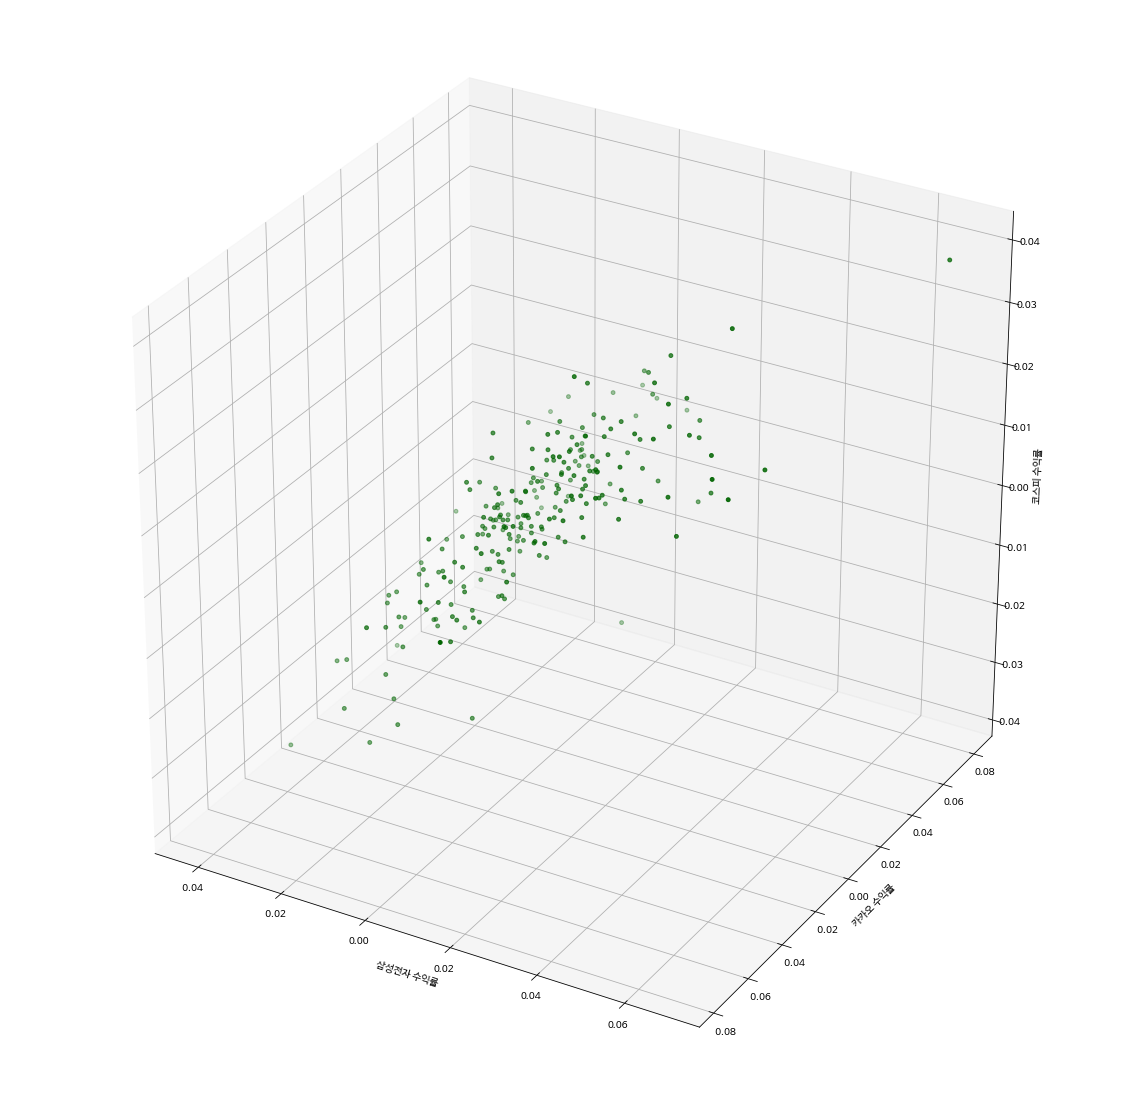

In [58]:
# 3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 추가해줍니다.
from mpl_toolkits.mplot3d import Axes3D

# figure 크기 설정
fig = plt.figure(figsize=(20, 20))
# 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
ax = fig.gca(projection='3d')
ax.scatter(ss,kk,ks, marker='o', s=15, c='darkgreen')
ax.set_xlabel("삼성전자 수익률")
ax.set_ylabel("카카오 수익률")
ax.set_zlabel("코스피 수익률")
plt.show()

In [59]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [61]:
model = ols('ks ~ ss + kk',data=temp).fit() 

In [62]:
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ks   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                nan
Time:                        00:34:21   Log-Likelihood:                 99.137
No. Observations:                   3   AIC:                            -192.3
Df Residuals:                       0   BIC:                            -195.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.075e-15        inf          0        nan         nan         nan
ss             0.5562        inf          0        nan         nan         nan
kk             0.1795        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.436
Skew:                          -0.557   Prob(JB):                        0.804
Kurtosis:                       1.500   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
B1, B2 = np.meshgrid(ss, kk, indexing='xy')
Z = np.zeros((ss.size, kk.size))
B1

array([[ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984],
       [ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984],
       [ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984],
       ...,
       [ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984],
       [ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984],
       [ 0.        , -0.00379514,  0.00568728, ...,  0.00491401,
         0.00366973, -0.01104984]])

In [80]:
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(model.params.Intercept + B1[i,j]*model.params.ss + B2[i,j]*model.params.kk)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


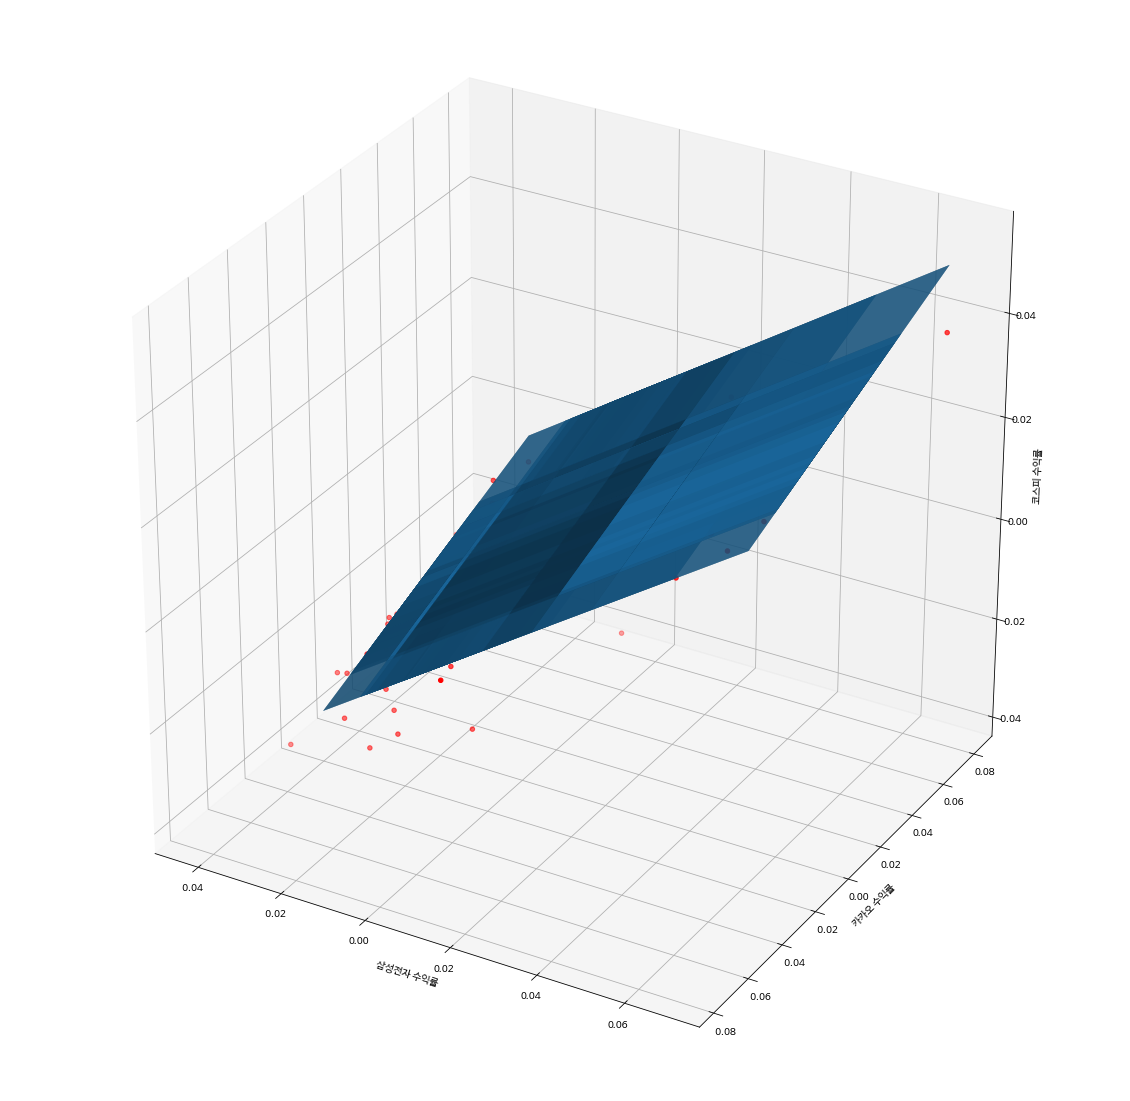

In [81]:
tmp = (ss,kk)
z = np.array(temp,model.fittedvalues)

# 3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 추가해줍니다.
from mpl_toolkits.mplot3d import Axes3D

# figure 크기 설정
fig = plt.figure(figsize=(20, 20))
# 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
ax = fig.gca(projection='3d')
ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(ss, kk, ks, c='r')
ax.set_xlabel("삼성전자 수익률")
ax.set_ylabel("카카오 수익률")
ax.set_zlabel("코스피 수익률")
plt.show()

In [82]:
# 참고사이트 : https://deep-learning-study.tistory.com/607